In [42]:
import numpy as np
import matplotlib.pyplot as plt

https://idmod.org/docs/malaria/model-seir.html

In [43]:
#parametres

Ro=3
t_incubation=6 # tres approximatif
t_infect=14 # tres approximatif

alpha=1/t_incubation  #Alpha:incubation
gamma=1/t_infect  #gamma: taux de récuperation 
beta=Ro/gamma    #beta:infection 


In [44]:
def SEIR(tout,param,t):
    """"""
    S0, E0, I0, R0 = tout
    alpha,beta,gamma=param
    
    #S:list[float]
    S = [S0]
    #E:list[float]
    E = [E0]
    #I:list[float]
    I = [I0]
    #R:list[float]
    R = [R0]

    dt = t[2] - t[1] # pour avoir un pas constant 
 
    for i in t[1:]:
        #formule pour le model SEIR un peu modifier avec le model d euler
        true_S = S[-1] - (beta * S[-1] * I[-1]) * dt
        true_E = E[-1] + (beta * S[-1] * I[-1] - alpha * E[-1]) * dt
        true_I = I[-1] + (alpha * E[-1] - gamma * I[-1]) * dt
        true_R = R[-1] + (gamma * I[-1]) * dt
        S.append(true_S)
        E.append(true_E)
        I.append(true_I)
        R.append(true_R)
        
    return np.stack([S, E, I, R]).T

Text(0.5, 1.0, 'Graph Covid-19 ')

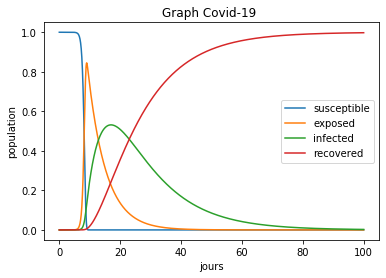

In [46]:
# simulation parm
t_max = 100
dt = 0.1


t = np.linspace(0, t_max, int(t_max/dt) +1 ) 
popu = 67000000 # population en france

# pour cette simulation nous devons fournir des valeurs initiales donv nous avons utiliser des valeurs de population normalisé
S0=1-1/popu
E0=1/popu          
I0=0
R0=0
tout=S0,E0,I0,R0


param = alpha, beta, gamma
results = SEIR(tout,param,t)


plt.plot(t, results);
plt.legend(("susceptible", "exposed", "infected", "recovered"))
plt.xlabel("jours")
plt.ylabel("population")
plt.title("Graph Covid-19 ")

    